# Ideal Properties of a Latent Space

**1. Compactness**
- Lower-dimensional than the input space
- Retains essential data features without redundancy
- Efficient representation for downstream tasks

**2. Structured Organization**
- Preserves semantic relationships between data points
- Similar inputs map to nearby latent points
- Enables meaningful interpolation and neighborhood operations

**3. Disentanglement**
- Each dimension represents an independent factor of variation
- Changes in one factor don't affect others
- Provides interpretable and controllable representations

**4. Continuity**
- Smooth transitions in latent space yield smooth data changes
- No abrupt jumps or discontinuities
- Supports stable generation and interpolation

**5. Generative Capability**
- Random sampling produces valid, realistic outputs
- Well-defined probability distribution over latent space
- No "holes" or invalid regions

**6. Class Separation**
- Different categories form distinct clusters
- Clear decision boundaries for classification
- Supports both supervised and unsupervised tasks

**7. Feature Invariance**
- Robust to irrelevant input variations
- Captures task-relevant features
- Filters out noise and nuisance factors

**8. Latent Smoothness**
- Small perturbations yield predictable changes
- Stable behavior under optimization
- Supports gradient-based manipulation

# Why AutoEncoder Latent Space Falls Short

**Structural Issues:**
- No guarantee of semantic organization
- Similar inputs can map to distant latent points
- Arbitrary encoding without meaningful structure

**Poor Generation:**
- Sparse coverage of latent space
- "Holes" between valid encodings
- Unrealistic outputs when sampling randomly

**Limited Disentanglement:**
- No mechanism for factor separation
- Entangled representations
- Difficult to control individual features

**Improved Variants:**
1. **Variational AutoEncoders (VAEs)**
   - Enforces continuous latent space
   - Gaussian prior for proper sampling
   - Better generation capabilities

2. **β-VAEs**
   - Enhanced disentanglement
   - Controlled information bottleneck
   - Trade-off between reconstruction and independence

3. **Adversarial AutoEncoders**
   - GAN-like training for better distribution matching
   - More realistic generation
   - Improved latent space structure

In [1]:
import itertools

import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Set seed for reproducibility
SEED = 47
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
plt.style.use('dark_background')

# Set device based on availability of Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} backend.")

Using cuda backend.


In [2]:
# Define data transforms
transform = transforms.Compose([transforms.ToTensor()])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [3]:
# AutoEncoder Model
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 2)  # Latent space
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, 28 * 28)
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z), z

In [4]:
# Initialize model, loss, and optimizer
model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model

AutoEncoder(
  (encoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
  )
)

In [5]:
# Training Loop
epochs = 50
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for images, _ in train_loader:
        images = images.to(device)
        reconstructed, _ = model(images)
        loss = criterion(reconstructed, images.view(-1, 28 * 28))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss / len(train_loader):.4f}")

Epoch 1/50, Loss: 0.0583
Epoch 2/50, Loss: 0.0485
Epoch 3/50, Loss: 0.0461
Epoch 4/50, Loss: 0.0446
Epoch 5/50, Loss: 0.0436
Epoch 6/50, Loss: 0.0428
Epoch 7/50, Loss: 0.0422
Epoch 8/50, Loss: 0.0415
Epoch 9/50, Loss: 0.0410
Epoch 10/50, Loss: 0.0406
Epoch 11/50, Loss: 0.0403
Epoch 12/50, Loss: 0.0400
Epoch 13/50, Loss: 0.0397
Epoch 14/50, Loss: 0.0395
Epoch 15/50, Loss: 0.0393
Epoch 16/50, Loss: 0.0391
Epoch 17/50, Loss: 0.0389
Epoch 18/50, Loss: 0.0387
Epoch 19/50, Loss: 0.0386
Epoch 20/50, Loss: 0.0384
Epoch 21/50, Loss: 0.0383
Epoch 22/50, Loss: 0.0381
Epoch 23/50, Loss: 0.0382
Epoch 24/50, Loss: 0.0380
Epoch 25/50, Loss: 0.0378
Epoch 26/50, Loss: 0.0377
Epoch 27/50, Loss: 0.0376
Epoch 28/50, Loss: 0.0375
Epoch 29/50, Loss: 0.0374
Epoch 30/50, Loss: 0.0374
Epoch 31/50, Loss: 0.0373
Epoch 32/50, Loss: 0.0371
Epoch 33/50, Loss: 0.0371
Epoch 34/50, Loss: 0.0371
Epoch 35/50, Loss: 0.0370
Epoch 36/50, Loss: 0.0369
Epoch 37/50, Loss: 0.0368
Epoch 38/50, Loss: 0.0367
Epoch 39/50, Loss: 0.

In [6]:
# Extract latent space
model.eval()
latent_space, labels = [], []
with torch.no_grad():
    for images, y in train_loader:
        images = images.to(device)
        _, z = model(images)
        latent_space.append(z.cpu().numpy())
        labels.append(y.numpy())
latent_space = np.concatenate(latent_space)
labels = np.concatenate(labels)

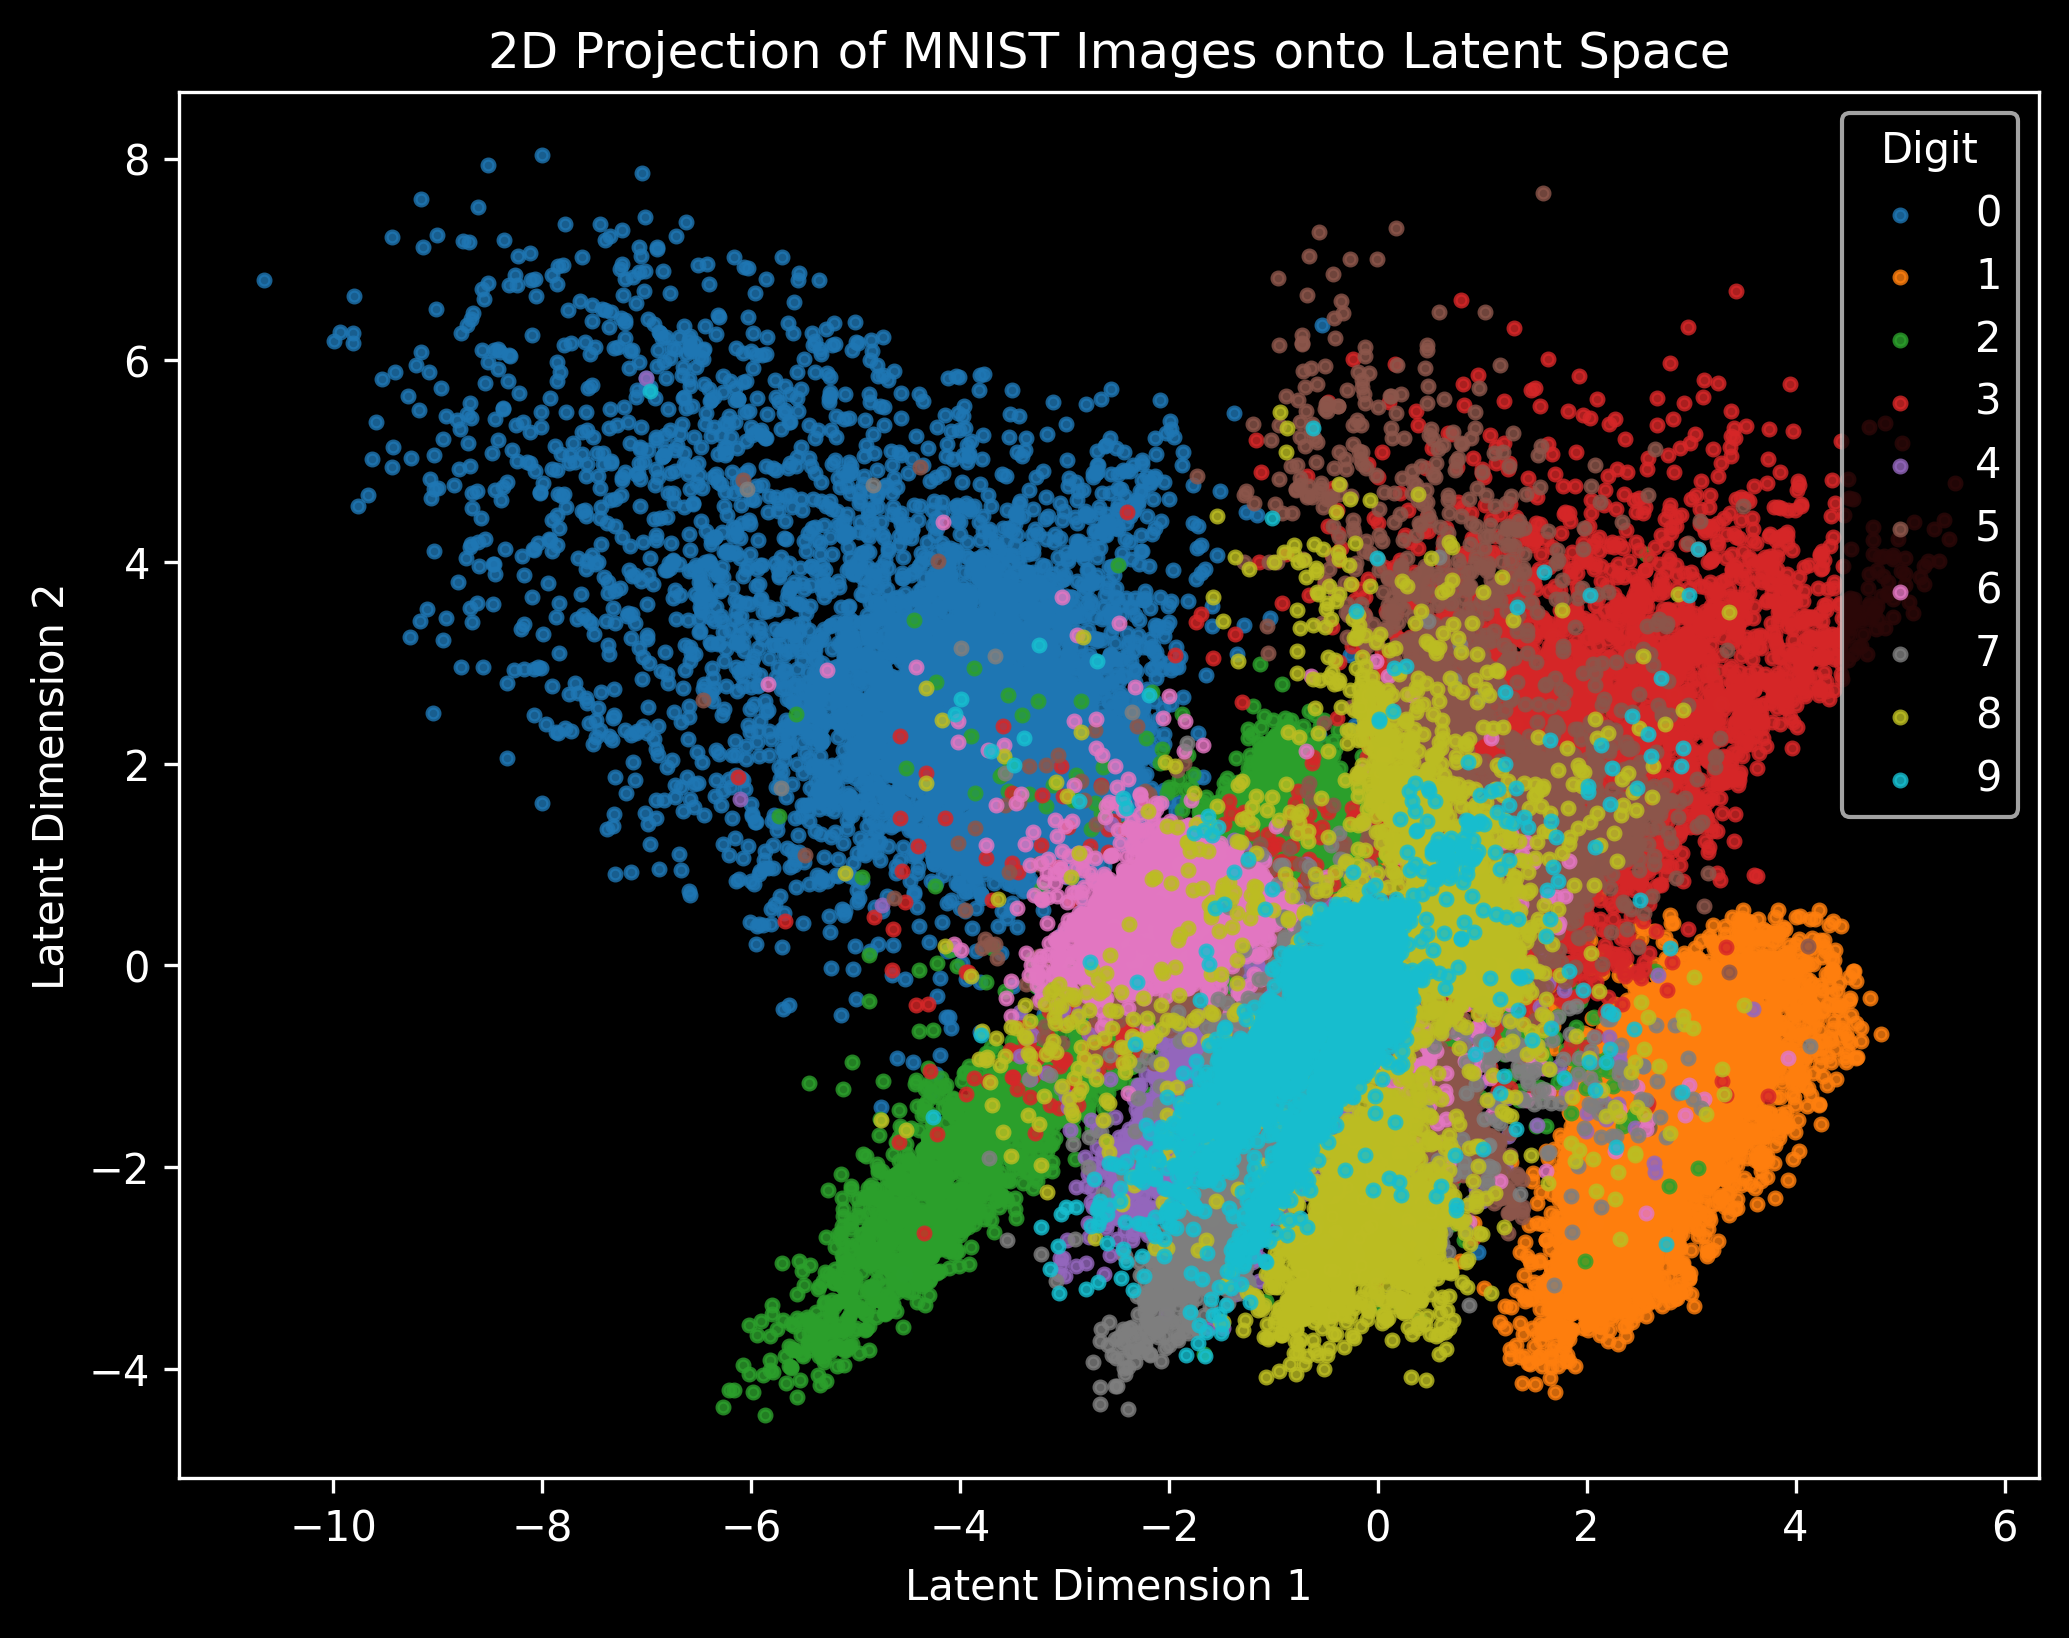

In [7]:
# Plot 2D Latent Space
plt.figure(figsize=(8, 6), dpi=300)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for class_label in range(10):
    indices = np.where(labels == class_label)
    plt.scatter(latent_space[indices, 0], latent_space[indices, 1], color=colors[class_label], label=str(class_label), alpha=0.8, s=8)
plt.legend(title="Digit", loc="upper right", fontsize=10)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("2D Projection of MNIST Images onto Latent Space")
plt.show()

In [8]:
# Display Original and Reconstructed Images
def display_reconstructed_images(model, data_loader, num_samples=3):
    model.eval()
    fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 3, 6))
    fig.suptitle("Original and Reconstructed Images", fontsize=16)

    with torch.no_grad():
        for i, (images, _) in enumerate(data_loader):
            images = images[:num_samples].to(device)
            reconstructed, _ = model(images)
            
            for j in range(num_samples):
                axes[0, j].imshow(images[j].cpu().squeeze(), cmap='gray')
                axes[0, j].axis("off")
                axes[0, j].set_title("Original")
            
            reconstructed_images = reconstructed.view(-1, 28, 28)
            for j in range(num_samples):
                axes[1, j].imshow(reconstructed_images[j].cpu().squeeze(), cmap='gray')
                axes[1, j].axis("off")
                axes[1, j].set_title("Reconstructed")

            break
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

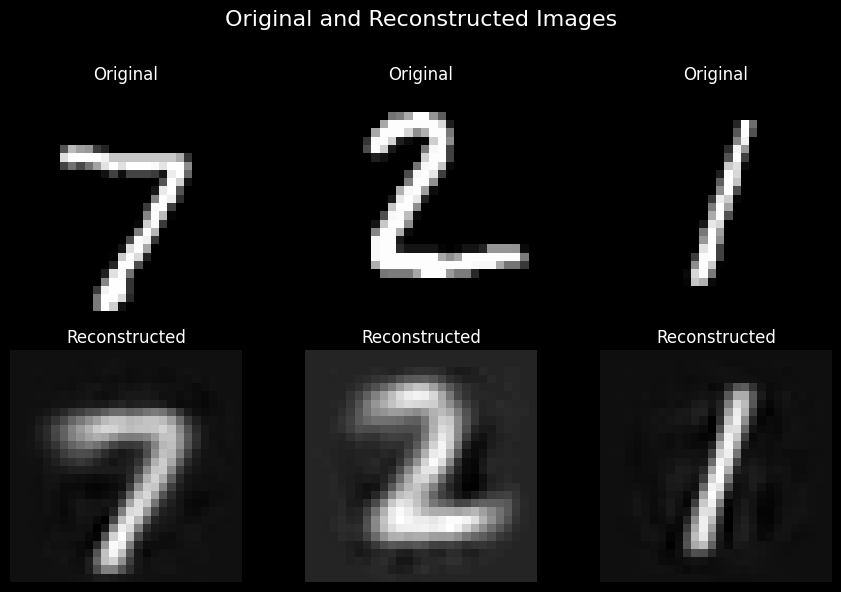

In [9]:
display_reconstructed_images(model, 
                             test_loader, 
                             num_samples=3)

In [10]:
# Sample from Latent Space and Visualize
def sample_from_latent_space(model, latent_coords, grid_shape=(2, 3)):
    model.eval()
    latent_coords = torch.tensor(latent_coords, dtype=torch.float32, device=device)

    with torch.no_grad():
        generated_images = model.decoder(latent_coords).view(-1, 28, 28).cpu()

    fig, axes = plt.subplots(*grid_shape, figsize=(grid_shape[1] * 3, grid_shape[0] * 3))
    fig.suptitle("Generated Images from Latent Space", fontsize=16)
    axes = axes.flatten()

    for i, image in enumerate(generated_images):
        axes[i].imshow(image, cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f"Latent: {[round(x, 2) for x in latent_coords[i].tolist()]}")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

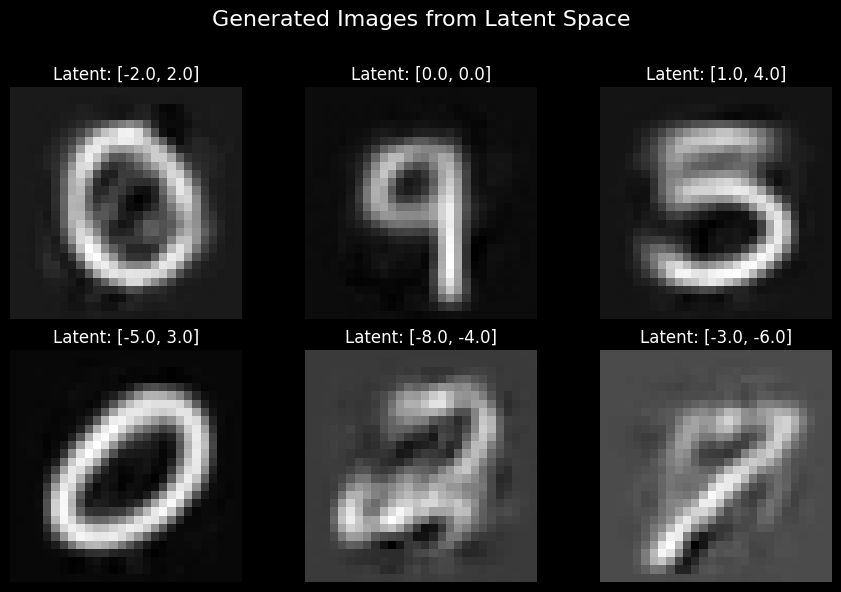

In [11]:
# Generate the arrays
latent_space_coords = [
    [-2, 2],
    [0, 0],
    [1, 4],
    [-5, 3],
    [-8, -4],
    [-3, -6]
]
sample_from_latent_space(model, 
                         latent_space_coords, 
                         grid_shape=(2, 3))